<a href="https://colab.research.google.com/github/mariomunooz/schneiderhackaton/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
%cd "/content/drive/MyDrive/hck"

/content/drive/MyDrive/hck


In [173]:
pip install PyPDF2

In [174]:
import pandas as pd
import numpy as np
import PyPDF2
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [175]:
df_train1 = pd.read_csv('train1.csv', usecols={'countryName','eprtrSectorName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','City','targetRelease','pollutant','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'}, sep=",")
df_train2 = pd.read_csv('train2.csv', usecols={'countryName','eprtrSectorName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','City','targetRelease','pollutant','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'}, sep=";")
df_train1

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,20,EUROPE,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f
1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,21,EUROPE,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,4,EUROPE,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada
3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,6,EUROPE,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,12,22,EUROPE,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18558,Finland,Energy sector,Thermal power stations and other combustion in...,http://paikkatiedot.fi/so/1002031/pf/Productio...,"Kainuun Voima Oy, Kajaanin Höyryvoimalaitos",Kajaani,AIR,Nitrogen oxides (NOX),2017,12,3,EUROPE,17.173104,18.165618,19.206412,12.180394,11.345370,13.765315,1,Cheryl Walker,daf6f012401242ec2edbb6664665aec1
18559,Spain,Paper and wood production and processing,Industrial plants for the production of paper ...,ES.CAED/001767000.FACILITY,"SMURFIT NAVARRA, S.A.-SANGÜESA",SANGUESA,AIR,Nitrogen oxides (NOX),2014,2,6,EUROPE,17.311122,19.381145,23.264591,5.390422,5.023346,7.512245,0,Dr. Kelly Stevens,32a88ade353bf6ab80d92adcdc9fc597
18560,Sweden,Energy sector,Thermal power stations and other combustion in...,SE.CAED/10018242.Facility,Åkerslund,Ängelholm,AIR,Carbon dioxide (CO2),2007,12,27,EUROPE,20.809501,19.884620,23.599190,5.441425,7.972029,10.933081,0,Susan Webster,48b66e1acf3029708edc2d68314d1cd2
18561,United Kingdom,Energy sector,Thermal power stations and other combustion in...,GB.EEA/13819.FACILITY,Teesside Crude Oil Stabalisation Terminal,Middlesbrough,AIR,Carbon dioxide (CO2),2012,6,25,EUROPE,11.186522,15.233248,21.058308,16.023482,16.286381,17.303344,5,Cole Greene,b4cb58c3a936665786359c2c634d6ff4


In [176]:
df_test = pd.read_csv('test_x.csv', usecols=  {'countryName','eprtrSectorName','EPRTRAnnexIMainActivityCode','FacilityInspireID','facilityName','City','targetRelease','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'}, sep=",")

In [177]:
df_test

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityCode,FacilityInspireID,facilityName,City,targetRelease,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Poland,Mineral industry,3(a),PL.MŚ/000002357.FACILITY,Polska Grupa Górnicza sp. z o.o. Oddział KWK R...,Rydułtowy,AIR,2017,8,16,EUROPE,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1,Brittany Buck,826b1de9dad293ae3e4f9cbaf6cf3420
1,Luxembourg,Waste and wastewater management,5(d),LU.CAED/000012000.FACILITY,Sidec,Diekirch,AIR,2008,11,22,EUROPE,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0,Lauren Fisher,ed30a6667b40ba0a66198b3173e7353f
2,Netherlands,Energy sector,1(c),NL.EEA/212857.FACILITY,Nuon Power Generation BV (Eemshaven),Eemshaven,AIR,2014,9,19,EUROPE,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2,Linda Thompson,78e1082c3cfef3bdf3554da8d6afcc34
3,Sweden,Waste and wastewater management,5(d),SE.CAED/10013901.Facility,HÖGBYTORPS AVFALLSANLÄGGNING,BRO,AIR,2011,7,17,EUROPE,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2,Bethany Mcmillan,27f959641950d381869d746d7d0e7d4e
4,Portugal,Energy sector,1(c),PT.EEA/133926.FACILITY,SPCG - Sociedade Portuguesa de Co-Geração Eléc...,SETÚBAL,AIR,2010,6,23,EUROPE,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2,Sarah Hoffman,1cb71655d9e0bd5cedb2320bf5fdd8f7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,Austria,Energy sector,1(c),AT.CAED/9008390486467.FACILITY,Trans Austria Gasleitung GmbH,Lechen,AIR,2014,11,16,EUROPE,11.243493,16.527223,18.114884,3.194254,3.901992,6.437241,2,Crystal Ramirez,a4c235acc3cd402a365de2ff369aa5b1
24476,Spain,Energy sector,1(c),ES.CAED/003589000.FACILITY,CENTRAL TÉRMICA DE ESCOMBRERAS,CARTAGENA,AIR,2007,12,13,EUROPE,14.645536,17.044528,24.602476,9.358224,8.708120,13.258552,0,Amber Grant,d43a0adde7c3a944e7ed740a2114e4a9
24477,Finland,Waste and wastewater management,5(d),http://paikkatiedot.fi/so/1002031/pf/Productio...,"Etelä-Karjalan Jätehuolto Oy, Jätekeskus",Konnunsuo,AIR,2019,12,12,EUROPE,16.789255,18.595172,24.997173,12.047347,14.686131,17.699271,2,Tiffany Smith,1b2b2db0d413ec0745c8c108317b9529
24478,Netherlands,Chemical industry,4(b),NL.RIVM/000104710.FACILITY,ESD-SIC BV,Farmsum,AIR,2013,3,24,EUROPE,14.899569,17.112356,19.236777,14.977559,17.846682,20.892999,1,Martin Owens,fe708d5280526c56317bf78b26a1dbd3


Obtaining training data from json

In [178]:
def get_json_data(links):
    pd.set_option('display.max_columns', None)
    training_datasets = []
    for link in links:
        df = pd.read_json(link)
        training_datasets.append(df)
    return training_datasets

In [179]:
links = ['http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first',
         'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second',
         'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third']

df_traning_datasets_jsons = get_json_data(links)

df_training3 = df_traning_datasets_jsons[0]
df_training4 = df_traning_datasets_jsons[1]
df_training5 = df_traning_datasets_jsons[2]

In [180]:
df_training3.filter(['countryName','eprtrSectorName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','City','targetRelease','pollutant','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'])
df_training4.filter(['countryName','eprtrSectorName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','City','targetRelease','pollutant','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'])
df_training5.filter(['countryName','eprtrSectorName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','City','targetRelease','pollutant','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'])

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Italy,Energy sector,Thermal power stations and other combustion in...,IT.CAED/101511001.FACILITY,Iren Energia S.p.A.,TORINO,AIR,Nitrogen oxides (NOX),2015,4,24,EUROPE,15.892429,15.708748,20.467596,7.367005,8.411709,12.571580,1,Ann Harris,7951666b94e0f0891e0c66b2381fca55
1,Poland,Energy sector,Thermal power stations and other combustion in...,PL.EEA/1321.FACILITY,Dalkia Łódź S.A. Elektrociepłownia nr 3,Łódź,AIR,Carbon dioxide (CO2),2011,4,4,EUROPE,14.168742,18.718322,25.439515,12.764269,15.676496,19.081248,0,Shelly Cannon,33c89df2492e8d3efda719c849b530ea
2,Ireland,Intensive livestock production and aquaculture,Installations for the intensive rearing of pig...,IE.CAED/P0489.FACILITY,Glen of Aherlow Pig Producers Co-Op Society Li...,Tipperary,AIR,Methane (CH4),2011,11,18,EUROPE,17.849098,18.177468,25.603904,9.278435,12.107379,15.912360,0,Joanna Fleming,4a8b9d98f65af3a29bbf298d8536c142
3,France,Mineral industry,"Installations for the manufacture of glass, in...",FR.CAED/3453.FACILITY,OI MANUFACTURING FRANCE REIMS,REIMS,AIR,Nitrogen oxides (NOX),2014,3,27,EUROPE,10.348395,16.136672,18.131688,12.132210,14.595775,16.897353,0,Scott Anderson,e38f45f4d669e9f69fa97bfe049ceed6
4,United Kingdom,Paper and wood production and processing,Industrial plants for the production of paper ...,UK.LAED/E375_434.FACILITY,EGGER (UK) LIMITED,Hexham,AIR,Nitrogen oxides (NOX),2012,9,28,EUROPE,13.803120,14.979708,22.215066,3.376109,4.694343,6.435358,2,Ms. Frances Wilkinson,fb960490e42477cbfdcd6bab1793f31e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,Cyprus,Energy sector,Thermal power stations and other combustion in...,CY.CAED/0030030000.FACILITY,"Electricity Authority of Cyprus, Vassilikos Po...",LARNAKA,AIR,Carbon dioxide (CO2),2008,1,1,EUROPE,13.475988,18.556476,22.852530,13.345801,12.410783,17.148327,0,Tammy Faulkner,2d4776365b33d5f1be53ea4606e2c79c
9497,Finland,Energy sector,Thermal power stations and other combustion in...,http://paikkatiedot.fi/so/1002031/pf/Productio...,"Turun Seudun Energiantuotanto Oy, Naantalin vo...",Naantali,AIR,Nitrogen oxides (NOX),2008,12,19,EUROPE,8.815939,14.461703,20.553781,3.820281,3.763833,5.657107,0,Dr. Courtney Bryant,020b11bf06b96aae1dd910a56674a8aa
9498,Slovenia,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,SI.ARSO/000000037.FACILITY,"Javne službe Ptuj, Odlagališče nenevarnih odpa...",Ptuj,AIR,Methane (CH4),2010,8,10,EUROPE,14.793298,16.688049,20.411498,17.285365,18.349798,21.538441,2,William Greer,84afdc8367dfd9124e8b8f994e986fe9
9499,Italy,Mineral industry,Underground mining and related operations,IT.CAED/850592002.FACILITY,Centro Olio Val d'Agri,VIGGIANO,AIR,Nitrogen oxides (NOX),2014,1,25,EUROPE,14.911317,16.144091,22.647192,6.387199,6.176238,9.269076,0,Leonard Roberts,09ad69bcf41256f40be3314a33e0438c


Obtaining training data from the pdf's

In [181]:
def clean_line(list):
    string = ''
    for i in list:
        if i != '':
            string += i
        else:
            string += ' '
    if string == 'Carbondioxide(CO2)':
        string = 'Carbon dioxide (CO2)'
    if string == 'Nitrogenoxides(NOX)':
        string = 'Nitrogen oxides (NOX)'
    if string == 'Methane(CH4)':
        string = 'Methane (CH4)'
    if string == 'UnitedKingdom':
      string = 'United Kingdom'

    if string == 'Chemicalindustry':    
      string =  'Chemical industry'
    if string == 'Mineralindustry':
        string = 'Mineral industry'
    if string == 'Paperandwoodproductionandprocessing':
        string = 'Paper and wood production and processing'
    if string == 'Waste andwastewatermanagement':
        string = 'Waste and wastewater management' 

    return string

In [182]:
def get_pdf_data(path):
    is_stored = {'path': False,
                 'nº:': False,
                 'FACILITYNAME:': False,
                 'FacilityInspireID:': False,
                 'COUNTRY:': False,
                 'CONTINENT:': False,
                 'CITY:': False,
                 'EPRTRSectorCode:': False,
                 'eprtrSectorName:': False,
                 'MainActivityCode:': False,
                 'targetRealase:': False,
                 'pollutant:': False,
                 'emissions:': False,
                 'DAY:': False,
                 'MONTH:': False,
                 'YEAR:': False,
                 'max_wind_speed:': False,
                 'min_wind_speed:': False,
                 'avg_wind_speed:': False,
                 'max_temp:': False,
                 'min_temp:': False,
                 'avg_temp:': False,
                 'DAYSFOG:': False,
                 'REPORTER NAME:': False,
                 'CITY_ID': False}

    # Obtain pdf text
    pdffileObj = open(path, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdffileObj)
    pageObj = pdfReader.getPage(0)
    text = pageObj.extractText()


    # first text cleaning (removing non sense spaces)

    text = text.split('\n')





    pdf_data_dict = {}
    pdf_data_dict['path'] = path
    is_stored['path'] = True

    for i in range(len(text)):
        a = text[i].split(' ')
        cleaned = clean_line(a)

        if cleaned in is_stored and is_stored[cleaned] == False:
            pdf_data_dict[cleaned] = clean_line(text[i+1].split(' '))

            is_stored[cleaned] = True


    return pdf_data_dict

In [183]:
def get_data_from_pdfs(folder):
    pdf_paths = [join(folder, f) for f in listdir(folder) if isfile(join(folder, f))]
    '''pdf_paths = [join('train6', 'pdfs81515.pdf')]'''
    df_traninin6_pdf = pd.DataFrame()

    for pdf_path in pdf_paths:
        pdf_data = get_pdf_data(pdf_path)
        df_traninin6_pdf = df_traninin6_pdf.append(pdf_data, ignore_index=True)

    return df_traninin6_pdf

In [184]:
df_training6 = get_data_from_pdfs('train6')




column_names = {
        'FACILITYNAME:'             : 'facilityName',
        'FacilityInspireID:'        : 'FacilityInspireID',
        'COUNTRY:'                  : 'countryName',
        'CONTINENT:'                : 'CONTINENT',
        'CITY:'                     : 'City',
        'eprtrSectorName:'          : 'eprtrSectorName',
        'targetRealase:'            : 'targetRelease',
        'pollutant:'                : 'pollutant',
        'DAY:'                      : 'DAY',
        'MONTH:'                    : 'MONTH',
        'YEAR:'                     : 'reportingYear',
        'max_wind_speed:'           : 'max_wind_speed',
        'min_wind_speed:'           : 'min_wind_speed',
        'avg_wind_speed:'           : 'avg_wind_speed',
        'max_temp:'                 : 'max_temp',
        'min_temp:'                 : 'min_temp',
        'avg_temp:'                 : 'avg_temp',
        'DAYSFOG:'                  : 'DAY WITH FOGS',
        'REPORTER NAME:'            : 'REPORTER NAME',
        'CITY_ID'                   : 'CITY ID'}

df_training6.rename(columns= column_names, inplace=True)
df_training6.drop('path', inplace=True, axis=1)
df_training6.drop('nº:', inplace=True, axis=1)

pd.set_option('display.max_columns', None)
df_training6.filter(['countryName','eprtrSectorName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','City','targetRelease','pollutant','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'])

,countryName,eprtrSectorName,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,United Kingdom,Energy sector,UK.SEPA/200000061.Facility,FifeEthylenePlant,Cowdenbeath,AIR,Carbon dioxide (CO2),2019,4,12,EUROPE,"1,52E+16","1,46E+16","2,06E+15","9,61E+15","8,69E+15","1,33E+16",19,ShawnGraham,3c563ab0d76fc84128574b5da82f769a
1,United Kingdom,Energy sector,UK.SEPA/200000061.Facility,FifeEthylenePlant,Cowdenbeath,AIR,Carbon dioxide (CO2),2019,4,12,EUROPE,"1,52E+16","1,46E+16","2,06E+15","9,61E+15","8,69E+15","1,33E+16",19,ShawnGraham,3c563ab0d76fc84128574b5da82f769a
2,United Kingdom,Energy sector,UK.SEPA/200000061.Facility,FifeEthylenePlant,Cowdenbeath,AIR,Nitrogen oxides (NOX),2019,1,3,EUROPE,"1,16E+16","1,65E+16","2,18E+16","8,03E+15","8,94E+15","1,04E+16",10,AaronJohnson,3c563ab0d76fc84128574b5da82f769a
3,United Kingdom,Mineral industry,UK.SEPA/200000073.Facility,AlloaGlassFactory,Alloa,AIR,Carbon dioxide (CO2),2019,11,9,EUROPE,"1,11E+16","1,6E+16","2,03E+16","-1,9E+16","1,33E+15","4,07E+16",4,VickiBrown,2cc8f54182c37b8907f534011ea01e6f
4,United Kingdom,Waste and wastewater management,UK.SEPA/200000081.Facility,"RestennethLandfillSite,Forfar",Forfar,AIR,Methane (CH4),2019,8,20,EUROPE,"1,2E+16","1,61E+16","2,35E+16","6,3E+15","8,42E+14","1,28E+16",3,TimothyWilliams,f66f865a6e8c90a9bcafc9def2e701f5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,United Kingdom,Energy sector,UK.SEPA/200002620.Facility,ShetlandGasPlant,Shetland,AIR,Carbon dioxide (CO2),2019,5,19,EUROPE,"1,59E+16","2,11E+15","2,32E+16","1,18E+16","1,45E+16","1,92E+16",18,JamesJohnson,223137a83f11fbc93f2af549579ee6ac
78,United Kingdom,Energy sector,UK.SEPA/200002620.Facility,ShetlandGasPlant,Shetland,AIR,Methane (CH4),2019,4,16,EUROPE,"1,28E+16","1,4E+16","1,8E+16","1,56E+16","1,81E+15","2,12E+15",6,Lindsey Fisher,223137a83f11fbc93f2af549579ee6ac
79,United Kingdom,Energy sector,UK.SEPA/200002620.Facility,ShetlandGasPlant,Shetland,AIR,Nitrogen oxides (NOX),2019,2,3,EUROPE,"1,35E+16","1,46E+15","1,78E+16","9,66E+15","1,1E+16","1,26E+16",19,BrianGonzalez,223137a83f11fbc93f2af549579ee6ac
80,United Kingdom,Waste and wastewater management,UK.SEPA/200002651.Facility,MillerhillRecycling& EnergyRecovery Centre,"Millerhill,Dalkeith",AIR,Carbon dioxide (CO2),2019,12,4,EUROPE,"2,09E+15","2,07E+15","2,46E+16","5,74E+15","7,31E+15","9,42E+15",6,JasonMoses,c662b4b4d859a9c224b5ac0acf221748


In [185]:
#df_train1.info()

In [186]:
#df_train2.info()

In [187]:
#df_training3.info()

In [188]:
#df_training4.info()

In [189]:
#df_training5.info()

In [190]:
df_train = pd.concat([df_train1,df_train2,df_training3,df_training4,df_training5,df_training6])
cols = df_train.columns
cols

Index(['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
       'pollutant', 'reportingYear', 'MONTH', 'DAY', 'CONTINENT',
       'max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_temp',
       'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID', '',
       'EPRTRAnnexIMainActivityCode', 'EPRTRSectorCode', 'EPRTRSectorCode:',
       'MainActivityCode:', 'emissions:'],
      dtype='object')

In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65710 entries, 0 to 81
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   countryName                   65710 non-null  object 
 1   eprtrSectorName               65710 non-null  object 
 2   EPRTRAnnexIMainActivityLabel  65628 non-null  object 
 3   FacilityInspireID             65710 non-null  object 
 4   facilityName                  65710 non-null  object 
 5   City                          65710 non-null  object 
 6   targetRelease                 65710 non-null  object 
 7   pollutant                     65710 non-null  object 
 8   reportingYear                 65710 non-null  object 
 9   MONTH                         65710 non-null  object 
 10  DAY                           65710 non-null  object 
 11  CONTINENT                     65710 non-null  object 
 12  max_wind_speed                65710 non-null  object 
 13  avg_

In [192]:
#df_train = df_train.drop(['','PRTRAnnexIMainActivityCode','EPRTRSectorCode'])
df_train

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID,,EPRTRAnnexIMainActivityCode,EPRTRSectorCode,EPRTRSectorCode:,MainActivityCode:,emissions:
0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,20,EUROPE,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f,NaN,NaN,NaN,NaN,NaN,NaN
1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,21,EUROPE,19.66155,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963,NaN,NaN,NaN,NaN,NaN,NaN
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,4,EUROPE,12.729453,14.701985,17.10393,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada,NaN,NaN,NaN,NaN,NaN,NaN
3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,6,EUROPE,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2,NaN,NaN,NaN,NaN,NaN,NaN
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,12,22,EUROPE,17.11193,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,United Kingdom,Energy sector,NaN,UK.SEPA/200002620.Facility,ShetlandGasPlant,Shetland,AIR,Carbon dioxide (CO2),2019,5,19,EUROPE,"1,59E+16","2,11E+15","2,32E+16","1,18E+16","1,45E+16","1,92E+16",18,JamesJohnson,223137a83f11fbc93f2af549579ee6ac,NaN,NaN,NaN,1,1(c),"2,08E+08"
78,United Kingdom,Energy sector,NaN,UK.SEPA/200002620.Facility,ShetlandGasPlant,Shetland,AIR,Methane (CH4),2019,4,16,EUROPE,"1,28E+16","1,4E+16","1,8E+16","1,56E+16","1,81E+15","2,12E+15",6,Lindsey Fisher,223137a83f11fbc93f2af549579ee6ac,NaN,NaN,NaN,1,1(c),101000
79,United Kingdom,Energy sector,NaN,UK.SEPA/200002620.Facility,ShetlandGasPlant,Shetland,AIR,Nitrogen oxides (NOX),2019,2,3,EUROPE,"1,35E+16","1,46E+15","1,78E+16","9,66E+15","1,1E+16","1,26E+16",19,BrianGonzalez,223137a83f11fbc93f2af549579ee6ac,NaN,NaN,NaN,1,1(c),148000
80,United Kingdom,Waste and wastewater management,NaN,UK.SEPA/200002651.Facility,MillerhillRecycling& EnergyRecovery Centre,"Millerhill,Dalkeith",AIR,Carbon dioxide (CO2),2019,12,4,EUROPE,"2,09E+15","2,07E+15","2,46E+16","5,74E+15","7,31E+15","9,42E+15",6,JasonMoses,c662b4b4d859a9c224b5ac0acf221748,NaN,NaN,NaN,5,5(b),"1,32E+08"


In [193]:
df_train = df_train[(df_train[cols[0]].isna()==False)  & 
                    (df_train[cols[1]].isna()==False)  & 
                    (df_train[cols[2]].isna()==False)  & 
                    (df_train[cols[3]].isna()==False)  & 
                    (df_train[cols[4]].isna()==False)  & 
                    (df_train[cols[5]] != "--")  & 
                    (df_train[cols[6]].isna()==False)  & 
                    (df_train[cols[7]].isna()==False)  & 
                    (df_train[cols[8]].isna()==False)  & 
                    (df_train[cols[9]].isna()==False)  & 
                    (df_train[cols[10]].isna()==False) & 
                    (df_train[cols[11]].isna()==False) & 
                    (df_train[cols[12]].isna()==False) & 
                    (df_train[cols[13]].isna()==False) & 
                    (df_train[cols[14]].isna()==False) & 
                    (df_train[cols[15]].isna()==False) & 
                    (df_train[cols[16]].isna()==False) & 
                    (df_train[cols[17]].isna()==False) & 
                    (df_train[cols[18]].isna()==False) & 
                    (df_train[cols[19]].isna()==False) & 
                    (df_train[cols[20]].isna()==False) & 
                    (df_train[cols[21]].isna()==False) & 
                    (df_train[cols[22]].isna()==False) & 
                    (df_train[cols[23]].isna()==False)
                    ]
df_train = df_train.filter(['countryName','eprtrSectorName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','City','targetRelease','pollutant','reportingYear','MONTH','DAY','CONTINENT','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME','CITY ID'])

In [194]:
df_train

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Netherlands,Chemical industry,Chemical installations for the production on a...,NL.RIVM/000019070.FACILITY,Indorama Ventures Europe BV,Europoort Rotterdam,AIR,Carbon dioxide (CO2),2020,3,2,EUROPE,11.019329,15.68645,20.899762,13.256816,12.326234,14.696895,1,Peter Rogers,4c325d62c064477ef17b4c6e4437e121
1,Greece,Mineral industry,Installations for the production of cement cli...,EL.CAED/100075.FACILITY,TITAN CEMENT S.A. - DREPANO PLANT,RION,AIR,Nitrogen oxides (NOX),2019,2,3,EUROPE,14.512395,18.39618,23.243403,4.528859,5.114688,9.219003,2,Thomas Gutierrez,f5e609e7095f91cc8ce9ed6d8e774a0d
3,Italy,Intensive livestock production and aquaculture,Installations for the intensive rearing of pou...,IT.CAED/260342003.FACILITY,SOCIETA' AGRICOLA SPARAVALLE DI FERRARI GIUSEP...,DRIZZONA,AIR,Methane (CH4),2014,10,17,EUROPE,18.283547,19.195731,26.696266,7.095682,9.502302,13.582024,1,Vanessa Dorsey,95b4e51f7b662598134e1eb956407c74
4,Germany,Waste and wastewater management,Installations for the recovery or disposal of ...,https://registry.gdi-de.org/id/de.nw.inspire.p...,Biomassekraftwerk Lünen GmbH,Lünen,AIR,Carbon dioxide (CO2),2015,9,6,EUROPE,13.759408,18.277089,24.768933,9.886774,11.58555,14.006226,0,Derrick Anderson,f4433be3b1bfaeeb0633eb65d04b1325
5,Spain,Energy sector,Thermal power stations and other combustion in...,ES.CAED/003521000.FACILITY,CENTRAL TERMICA LA ROBLA,ROBLA (LA),AIR,Nitrogen oxides (NOX),2018,5,6,EUROPE,21.672706,21.182015,28.764699,17.594652,17.561566,21.903443,1,Erin Waters,f393ee2c038064b903a4e07af28d71ad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,Cyprus,Energy sector,Thermal power stations and other combustion in...,CY.CAED/0030030000.FACILITY,"Electricity Authority of Cyprus, Vassilikos Po...",LARNAKA,AIR,Carbon dioxide (CO2),2008,1,1,EUROPE,13.475988,18.556476,22.85253,13.345801,12.410783,17.148327,0,Tammy Faulkner,2d4776365b33d5f1be53ea4606e2c79c
9497,Finland,Energy sector,Thermal power stations and other combustion in...,http://paikkatiedot.fi/so/1002031/pf/Productio...,"Turun Seudun Energiantuotanto Oy, Naantalin vo...",Naantali,AIR,Nitrogen oxides (NOX),2008,12,19,EUROPE,8.815939,14.461703,20.553781,3.820281,3.763833,5.657107,0,Dr. Courtney Bryant,020b11bf06b96aae1dd910a56674a8aa
9498,Slovenia,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,SI.ARSO/000000037.FACILITY,"Javne službe Ptuj, Odlagališče nenevarnih odpa...",Ptuj,AIR,Methane (CH4),2010,8,10,EUROPE,14.793298,16.688049,20.411498,17.285365,18.349798,21.538441,2,William Greer,84afdc8367dfd9124e8b8f994e986fe9
9499,Italy,Mineral industry,Underground mining and related operations,IT.CAED/850592002.FACILITY,Centro Olio Val d'Agri,VIGGIANO,AIR,Nitrogen oxides (NOX),2014,1,25,EUROPE,14.911317,16.144091,22.647192,6.387199,6.176238,9.269076,0,Leonard Roberts,09ad69bcf41256f40be3314a33e0438c


In [195]:
from sklearn import preprocessing
encoders = {}
'''cols_to_int1 = (['countryName','eprtrSectorName','FacilityInspireID','facilityName','City',	'targetRelease','pollutant','CONTINENT','REPORTER NAME','CITY ID'])
new_cols1 =    (['countryName_coded','EPRTRAnnexIMainActivityLabel_coded','FacilityInspireID_coded','facilityName_coded','City_coded',	'targetRelease_coded','pollutant_coded','CONTINENT_coded','REPORTER NAME_coded','CITY ID_coded'])

cols_to_int2 = (['countryName','eprtrSectorName','FacilityInspireID','facilityName','City',	'targetRelease','CONTINENT','REPORTER NAME','CITY ID'])
new_cols2 =    (['countryName_coded','EPRTRAnnexIMainActivityLabel_coded','FacilityInspireID_coded','facilityName_coded','City_coded',	'targetRelease_coded','CONTINENT_coded','REPORTER NAME_coded','CITY ID_coded'])

for idx,i in enumerate(cols_to_int1):
    encoders[i] = preprocessing.LabelEncoder()

    Categ = df_train[i]
    encoders[i].fit(Categ.values)
    df_train[new_cols1[idx]]=encoders[i].transform(df_train[i].values)

for idx,i in enumerate(cols_to_int2):
    Categ2 = df_test[i]
    encoders[i].fit(Categ2.values)
    df_test[new_cols2[idx]]=encoders[i].transform(df_test[i].values)
'''

"cols_to_int1 = (['countryName','eprtrSectorName','FacilityInspireID','facilityName','City',\t'targetRelease','pollutant','CONTINENT','REPORTER NAME','CITY ID'])\nnew_cols1 =    (['countryName_coded','EPRTRAnnexIMainActivityLabel_coded','FacilityInspireID_coded','facilityName_coded','City_coded',\t'targetRelease_coded','pollutant_coded','CONTINENT_coded','REPORTER NAME_coded','CITY ID_coded'])\n\ncols_to_int2 = (['countryName','eprtrSectorName','FacilityInspireID','facilityName','City',\t'targetRelease','CONTINENT','REPORTER NAME','CITY ID'])\nnew_cols2 =    (['countryName_coded','EPRTRAnnexIMainActivityLabel_coded','FacilityInspireID_coded','facilityName_coded','City_coded',\t'targetRelease_coded','CONTINENT_coded','REPORTER NAME_coded','CITY ID_coded'])\n\nfor idx,i in enumerate(cols_to_int1):\n    encoders[i] = preprocessing.LabelEncoder()\n\n    Categ = df_train[i]\n    encoders[i].fit(Categ.values)\n    df_train[new_cols1[idx]]=encoders[i].transform(df_train[i].values)\n\nfor idx,

In [196]:
from sklearn import preprocessing
encoders = {}
cols_to_int = (['countryName','eprtrSectorName','FacilityInspireID','facilityName','City',	'targetRelease','pollutant','CONTINENT','REPORTER NAME','CITY ID'])

df_test['pollutant'] = 0


for i in cols_to_int:
    encoders[i] = preprocessing.LabelEncoder()
    Categ = df_train[i]
    encoders[i].fit(Categ.values) 
    df_train[str(i)+"_coded"] = encoders[i].transform(df_train[i].values)
    
    Categ2 = df_test[i]
    encoders[i].fit(Categ2.values) 
    df_test[str(i)+"_coded"] = encoders[i].transform(df_test[i].values)
    

df_test = df_test.filter(['countryName_coded','eprtrSectorName_coded','EPRTRAnnexIMainActivityLabel_coded','FacilityInspireID_coded','facilityName_coded','City_coded','reportingYear','MONTH','DAY','CONTINENT_coded','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME_coded','CITY ID_coded'],axis=1)
df_test

,countryName_coded,eprtrSectorName_coded,FacilityInspireID_coded,facilityName_coded,City_coded,reportingYear,MONTH,DAY,CONTINENT_coded,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME_coded,CITY ID_coded
0,22,4,4002,4259,3160,2017,8,16,0,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1,2844,2208
1,18,8,3413,5239,1020,2008,11,22,0,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0,12658,4031
2,20,2,3448,3905,1143,2014,9,19,0,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2,12924,2033
3,29,8,4399,2788,369,2011,7,17,0,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2,2164,659
4,23,2,4153,4990,3338,2010,6,23,0,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2,18330,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,0,2,9,5734,2106,2014,11,16,0,11.243493,16.527223,18.114884,3.194254,3.901992,6.437241,2,4647,2770
24476,28,2,1234,868,635,2007,12,13,0,14.645536,17.044528,24.602476,9.358224,8.708120,13.258552,0,791,3599
24477,8,8,5356,2206,1892,2019,12,12,0,16.789255,18.595172,24.997173,12.047347,14.686131,17.699271,2,20181,445
24478,20,1,3562,1982,1271,2013,3,24,0,14.899569,17.112356,19.236777,14.977559,17.846682,20.892999,1,13898,4325


In [197]:
#df_test = df_test.drop(['pollutant_coded'],axis=1)
df_test.shape

(24480, 18)

In [198]:
df_train.corr(method='pearson')['pollutant_coded'].sort_values()

City_coded                -0.009889
FacilityInspireID_coded   -0.004075
CITY ID_coded             -0.003986
facilityName_coded        -0.003579
eprtrSectorName_coded     -0.002717
REPORTER NAME_coded       -0.002603
countryName_coded          0.005932
pollutant_coded            1.000000
targetRelease_coded             NaN
CONTINENT_coded                 NaN
Name: pollutant_coded, dtype: float64

In [199]:
df_train2 = df_train.copy()
df_train2 = df_train.filter(['countryName_coded','eprtrSectorName_coded','EPRTRAnnexIMainActivityLabel_coded','FacilityInspireID_coded','facilityName_coded','City_coded','reportingYear','MONTH','DAY','CONTINENT_coded','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME_coded','CITY ID_coded','pollutant_coded'],axis=1)
df_train2 

,countryName_coded,eprtrSectorName_coded,FacilityInspireID_coded,facilityName_coded,City_coded,reportingYear,MONTH,DAY,CONTINENT_coded,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME_coded,CITY ID_coded,pollutant_coded
0,20,1,3614,3096,1245,2020,3,2,0,11.019329,15.68645,20.899762,13.256816,12.326234,14.696895,1,18415,1319,0
1,11,4,910,5760,3132,2019,2,3,0,14.512395,18.39618,23.243403,4.528859,5.114688,9.219003,2,22309,4336,2
3,15,3,2974,5097,1017,2014,10,17,0,18.283547,19.195731,26.696266,7.095682,9.502302,13.582024,1,23222,2620,1
4,10,8,6064,643,2268,2015,9,6,0,13.759408,18.277089,24.768933,9.886774,11.58555,14.006226,0,6390,4305,0
5,28,2,1253,871,3140,2018,5,6,0,21.672706,21.182015,28.764699,17.594652,17.561566,21.903443,1,7770,4292,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,4,2,376,2136,2036,2008,1,1,0,13.475988,18.556476,22.85253,13.345801,12.410783,17.148327,0,21832,769,0
9497,8,2,5358,5930,2626,2008,12,19,0,8.815939,14.461703,20.553781,3.820281,3.763833,5.657107,0,6814,35,2
9498,27,8,4696,3171,3066,2010,8,10,0,14.793298,16.688049,20.411498,17.285365,18.349798,21.538441,2,23680,2324,1
9499,15,4,3252,1377,4099,2014,1,25,0,14.911317,16.144091,22.647192,6.387199,6.176238,9.269076,0,14159,169,2


In [200]:
#df_test = df_test.drop(['countryName','eprtrSectorName','FacilityInspireID','facilityName','City',	'targetRelease','CONTINENT','REPORTER NAME','CITY ID','EPRTRAnnexIMainActivityCode'],axis=1)
df_test

,countryName_coded,eprtrSectorName_coded,FacilityInspireID_coded,facilityName_coded,City_coded,reportingYear,MONTH,DAY,CONTINENT_coded,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME_coded,CITY ID_coded
0,22,4,4002,4259,3160,2017,8,16,0,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1,2844,2208
1,18,8,3413,5239,1020,2008,11,22,0,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0,12658,4031
2,20,2,3448,3905,1143,2014,9,19,0,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2,12924,2033
3,29,8,4399,2788,369,2011,7,17,0,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2,2164,659
4,23,2,4153,4990,3338,2010,6,23,0,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2,18330,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,0,2,9,5734,2106,2014,11,16,0,11.243493,16.527223,18.114884,3.194254,3.901992,6.437241,2,4647,2770
24476,28,2,1234,868,635,2007,12,13,0,14.645536,17.044528,24.602476,9.358224,8.708120,13.258552,0,791,3599
24477,8,8,5356,2206,1892,2019,12,12,0,16.789255,18.595172,24.997173,12.047347,14.686131,17.699271,2,20181,445
24478,20,1,3562,1982,1271,2013,3,24,0,14.899569,17.112356,19.236777,14.977559,17.846682,20.892999,1,13898,4325


Create new dataframe with reporting year, pollutan, EPRTRAnnexIMainActivityLabel_coded and DAY WITH FOGS.

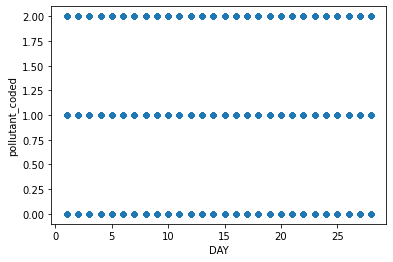

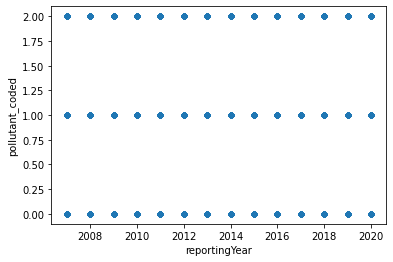

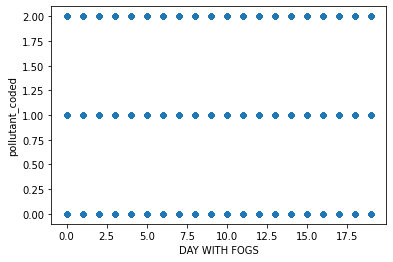

In [201]:
df = pd.DataFrame(df_train2,columns=['DAY','pollutant_coded'])
df.plot(x ='DAY', y='pollutant_coded', kind = 'scatter')
plt.show()

df = pd.DataFrame(df_train2,columns=['reportingYear','pollutant_coded'])
df.plot(x ='reportingYear', y='pollutant_coded', kind = 'scatter')
plt.show()

df = pd.DataFrame(df_train2,columns=['DAY WITH FOGS','pollutant_coded'])
df.plot(x ='DAY WITH FOGS', y='pollutant_coded', kind = 'scatter')
plt.show()

In [202]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27642 entries, 0 to 9500
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   countryName_coded        27642 non-null  int64 
 1   eprtrSectorName_coded    27642 non-null  int64 
 2   FacilityInspireID_coded  27642 non-null  int64 
 3   facilityName_coded       27642 non-null  int64 
 4   City_coded               27642 non-null  int64 
 5   reportingYear            27642 non-null  object
 6   MONTH                    27642 non-null  object
 7   DAY                      27642 non-null  object
 8   CONTINENT_coded          27642 non-null  int64 
 9   max_wind_speed           27642 non-null  object
 10  avg_wind_speed           27642 non-null  object
 11  min_wind_speed           27642 non-null  object
 12  max_temp                 27642 non-null  object
 13  avg_temp                 27642 non-null  object
 14  min_temp                 27642 non-null

In [203]:
df_test

,countryName_coded,eprtrSectorName_coded,FacilityInspireID_coded,facilityName_coded,City_coded,reportingYear,MONTH,DAY,CONTINENT_coded,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME_coded,CITY ID_coded
0,22,4,4002,4259,3160,2017,8,16,0,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1,2844,2208
1,18,8,3413,5239,1020,2008,11,22,0,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0,12658,4031
2,20,2,3448,3905,1143,2014,9,19,0,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2,12924,2033
3,29,8,4399,2788,369,2011,7,17,0,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2,2164,659
4,23,2,4153,4990,3338,2010,6,23,0,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2,18330,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,0,2,9,5734,2106,2014,11,16,0,11.243493,16.527223,18.114884,3.194254,3.901992,6.437241,2,4647,2770
24476,28,2,1234,868,635,2007,12,13,0,14.645536,17.044528,24.602476,9.358224,8.708120,13.258552,0,791,3599
24477,8,8,5356,2206,1892,2019,12,12,0,16.789255,18.595172,24.997173,12.047347,14.686131,17.699271,2,20181,445
24478,20,1,3562,1982,1271,2013,3,24,0,14.899569,17.112356,19.236777,14.977559,17.846682,20.892999,1,13898,4325


In [204]:
#df_train3 = df_train2.loc[:,['countryName_coded','eprtrSectorName_coded','FacilityInspireID_coded','facilityName_coded','City_coded','targetRelease_coded','pollutant_coded','reportingYear','MONTH','DAY','CONTINENT_coded','max_wind_speed','avg_wind_speed','min_wind_speed','max_temp','avg_temp','min_temp','DAY WITH FOGS','REPORTER NAME_coded','CITY ID_coded']]

x_train, x_test, y_train, y_test= train_test_split (df_train2.iloc[:,:-1], df_train2.iloc[:,-1], test_size=0.20, random_state=42) 


#BAGGING ENSEMBLE
modelRF=RandomForestClassifier()
modelRF.fit(x_train,y_train)
y_predRF=modelRF.predict(x_test)

print("The confusion matrix is:")
matrixRF=confusion_matrix(y_test,y_predRF)
print(matrixRF)
print("The accuracy is:")
accuracyRF=modelRF.score(x_test,y_test)
print(accuracyRF*100)
print('The Classification is:')
classificationRF=classification_report(y_test,y_predRF)
print(classificationRF)

y_train

The confusion matrix is:
[[ 757  100 1043]
 [  99 1161  125]
 [ 778  136 1330]]
The accuracy is:
58.744800144691624
The Classification is:
              precision    recall  f1-score   support

           0       0.46      0.40      0.43      1900
           1       0.83      0.84      0.83      1385
           2       0.53      0.59      0.56      2244

    accuracy                           0.59      5529
   macro avg       0.61      0.61      0.61      5529
weighted avg       0.58      0.59      0.58      5529



2684    2
5551    2
4543    2
1686    0
5946    1
       ..
3224    0
5564    0
882     2
6764    0
5375    2
Name: pollutant_coded, Length: 22113, dtype: int64

In [205]:
df_train2

,countryName_coded,eprtrSectorName_coded,FacilityInspireID_coded,facilityName_coded,City_coded,reportingYear,MONTH,DAY,CONTINENT_coded,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME_coded,CITY ID_coded,pollutant_coded
0,20,1,3614,3096,1245,2020,3,2,0,11.019329,15.68645,20.899762,13.256816,12.326234,14.696895,1,18415,1319,0
1,11,4,910,5760,3132,2019,2,3,0,14.512395,18.39618,23.243403,4.528859,5.114688,9.219003,2,22309,4336,2
3,15,3,2974,5097,1017,2014,10,17,0,18.283547,19.195731,26.696266,7.095682,9.502302,13.582024,1,23222,2620,1
4,10,8,6064,643,2268,2015,9,6,0,13.759408,18.277089,24.768933,9.886774,11.58555,14.006226,0,6390,4305,0
5,28,2,1253,871,3140,2018,5,6,0,21.672706,21.182015,28.764699,17.594652,17.561566,21.903443,1,7770,4292,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,4,2,376,2136,2036,2008,1,1,0,13.475988,18.556476,22.85253,13.345801,12.410783,17.148327,0,21832,769,0
9497,8,2,5358,5930,2626,2008,12,19,0,8.815939,14.461703,20.553781,3.820281,3.763833,5.657107,0,6814,35,2
9498,27,8,4696,3171,3066,2010,8,10,0,14.793298,16.688049,20.411498,17.285365,18.349798,21.538441,2,23680,2324,1
9499,15,4,3252,1377,4099,2014,1,25,0,14.911317,16.144091,22.647192,6.387199,6.176238,9.269076,0,14159,169,2


In [206]:
df_test

,countryName_coded,eprtrSectorName_coded,FacilityInspireID_coded,facilityName_coded,City_coded,reportingYear,MONTH,DAY,CONTINENT_coded,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME_coded,CITY ID_coded
0,22,4,4002,4259,3160,2017,8,16,0,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1,2844,2208
1,18,8,3413,5239,1020,2008,11,22,0,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0,12658,4031
2,20,2,3448,3905,1143,2014,9,19,0,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2,12924,2033
3,29,8,4399,2788,369,2011,7,17,0,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2,2164,659
4,23,2,4153,4990,3338,2010,6,23,0,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2,18330,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,0,2,9,5734,2106,2014,11,16,0,11.243493,16.527223,18.114884,3.194254,3.901992,6.437241,2,4647,2770
24476,28,2,1234,868,635,2007,12,13,0,14.645536,17.044528,24.602476,9.358224,8.708120,13.258552,0,791,3599
24477,8,8,5356,2206,1892,2019,12,12,0,16.789255,18.595172,24.997173,12.047347,14.686131,17.699271,2,20181,445
24478,20,1,3562,1982,1271,2013,3,24,0,14.899569,17.112356,19.236777,14.977559,17.846682,20.892999,1,13898,4325


In [207]:
prob_y_predRF= modelRF.predict_proba(df_test)
cutoff_rank=[0.2,0.4,0.55,0.6,0.8]
for cutoff in cutoff_rank:
  prob_y_predRF= modelRF.predict_proba(df_test)
  y_pred_modification=[]
  for i in range(len(df_test)):
    if prob_y_predRF[i,1]>=cutoff:
      y_pred_modification.append(1)
    else:
      y_pred_modification.append(0)  

  print("The cutoff value is:",cutoff)
  print("The confusion matrix is:")
  matrixRF=confusion_matrix(y_test,y_pred_modification)   
  print(matrixRF)
  print("The classification table is:")
  classificationRF=classification_report(y_test,y_pred_modification)
  print(classificationRF)

The cutoff value is: 0.2
The confusion matrix is:


ValueError: ignored